**Data Handling and Exploration**

In [2]:
#Load the dataset
import pandas as pd

file_path = '/content/Assessment Data.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Displaying  first few rows of the dataset
print(df.head())

      login    ticket  symbol  type            open_time           close_time  \
0  11173702  47345780  XAUUSD   Buy  2024.07.30 11:05:29  2024-07-31 07:58:09   
1  11173702  47718163  XAUUSD   Buy  2024.07.31 09:46:04  2024-07-31 21:42:15   
2  11173702  50360070  XAUUSD  Sell  2024.08.13 13:03:27  2024-08-14 15:24:08   
3  11173702  51120570  XAUUSD   Buy  2024.08.19 13:27:40  2024-08-19 16:37:12   
4  11173702  52180073  XAUUSD  Sell  2024.08.28 02:30:32  2024-08-28 15:29:39   

   open_price  close_price  stop loss  take profit    pips  reason  volume  \
0     2391.28      2420.69    2367.62      2420.64  2936.0       4     190   
1     2421.81      2431.41    2399.23      2431.41   960.0       4     200   
2     2460.93      2472.80    2480.93      2451.37 -1199.0       0     200   
3     2495.80      2485.65    2485.71      2508.16 -1012.0       3     190   
4     2526.53      2496.42    2537.07      2496.82  2971.0       4     189   

    profit  
0  5578.40  
1  1920.00  
2 -23

In [3]:
#Initial Exploratory Data Analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Get the number of rows and columns
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Get the column names
print(f"Columns: {df.columns.tolist()}")

#basic information about the dataset
df.info()

Rows: 59317, Columns: 14
Columns: ['login', 'ticket', 'symbol', 'type', 'open_time', 'close_time', 'open_price', 'close_price', 'stop loss', 'take profit', 'pips', 'reason', 'volume', 'profit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59317 entries, 0 to 59316
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   login        59317 non-null  int64  
 1   ticket       59317 non-null  int64  
 2   symbol       59317 non-null  object 
 3   type         59317 non-null  object 
 4   open_time    59317 non-null  object 
 5   close_time   59317 non-null  object 
 6   open_price   59317 non-null  float64
 7   close_price  59317 non-null  float64
 8   stop loss    59317 non-null  float64
 9   take profit  59317 non-null  float64
 10  pips         59317 non-null  float64
 11  reason       59317 non-null  int64  
 12  volume       59317 non-null  int64  
 13  profit       59317 non-null  float64
dtypes: float64(6), int64

In [4]:
# Summary statistics for numerical features
df.describe()

,login,ticket,open_price,close_price,stop loss,take profit,pips,reason,volume,profit
count,5.931700e+04,5.931700e+04,59317.000000,59317.000000,59317.000000,5.931700e+04,5.931700e+04,59317.000000,59317.000000,59317.000000
mean,4.274373e+07,4.820009e+07,9247.848230,9249.311204,6119.568535,4.895936e+03,1.115243e+02,7.236711,176.008463,22.606170
std,2.126909e+08,2.781208e+07,20700.786785,20702.285285,17961.190194,1.736828e+04,3.093160e+04,6.774457,1768.198799,687.227407
min,1.117370e+07,7.631230e+05,0.308400,0.325050,0.000000,0.000000e+00,-1.465680e+06,0.000000,1.000000,-12250.000000
25%,1.318703e+07,2.785692e+07,70.730000,70.940000,0.000000,0.000000e+00,-1.890000e+02,1.000000,20.000000,-102.000000
50%,1.327834e+07,5.709664e+07,2645.190000,2645.790000,1.248030,9.317200e-01,7.200000e+00,4.000000,51.000000,2.000000
75%,1.340079e+07,7.241683e+07,2755.480000,2755.220000,2667.400000,2.648650e+03,2.430000e+02,16.000000,150.000000,81.860000
max,2.145732e+09,8.051714e+07,109111.000000,108304.000000,442230.000000,1.085760e+06,1.560000e+06,17.000000,100000.000000,19061.100000


In [5]:
# Identify Missing Values
missing_values = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# print missing values
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
print(missing_df[missing_df['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [6]:
# Check for missing values in each column
print(df.isnull().sum())

# Calculate the percentage of missing values
print(df.isnull().mean() * 100)

login          0
ticket         0
symbol         0
type           0
open_time      0
close_time     0
open_price     0
close_price    0
stop loss      0
take profit    0
pips           0
reason         0
volume         0
profit         0
dtype: int64
login          0.0
ticket         0.0
symbol         0.0
type           0.0
open_time      0.0
close_time     0.0
open_price     0.0
close_price    0.0
stop loss      0.0
take profit    0.0
pips           0.0
reason         0.0
volume         0.0
profit         0.0
dtype: float64


In [7]:
# Identify and Remove Duplicate rows
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [8]:
# Identify Inconsistencies
# checking negative values
print("Rows with negative pips:\n", df[df['pips'] < 0])
print("Rows with negative profit:\n", df[df['profit'] < 0])

Rows with negative pips:
             login    ticket  symbol  type            open_time  \
2        11173702  50360070  XAUUSD  Sell  2024.08.13 13:03:27   
3        11173702  51120570  XAUUSD   Buy  2024.08.19 13:27:40   
5        11173702  52365859  XAUUSD  Sell  2024.08.29 11:21:25   
7        11173702  52745364  XAUUSD   Buy  2024.09.03 13:33:39   
9        11173702  54456088  XAUUSD  Sell  2024.09.23 18:34:08   
...           ...       ...     ...   ...                  ...   
59312  2145732336   2412502  NZDUSD  sell  2024.11.07 11:23:51   
59313  2145732336   2426484  GBPNZD   buy  2024.11.11 14:41:30   
59314  2145732336   2433467  GBPNZD   buy  2024.11.12 15:30:58   
59315  2145732336   2437184  EURGBP  sell  2024.11.13 09:40:04   
59316  2145732336   2444120  GBPJPY   buy  2024.11.14 10:22:55   

                close_time  open_price  close_price   stop loss  take profit  \
2      2024-08-14 15:24:08  2460.93000   2472.80000  2480.93000     2451.370   
3      2024-08-19 16:

In [9]:
# Checking for invalid values in categorical columns
print("Unique values in 'type':", df['type'].unique())
print("Unique values in 'reason':", df['reason'].unique())

Unique values in 'type': ['Buy' 'Sell' 'sell' 'buy']
Unique values in 'reason': [ 4  0  3 16  2  1 17  5]


In [10]:
# handle unique values in 'type' column
df['type'] = df['type'].str.lower()

In [11]:
# Checking for placeholder values in the 'close_time' column
placeholder_count = (df['close_time'] == '#############').sum()
print("Number of placeholder values in 'close_time':", placeholder_count)

Number of placeholder values in 'close_time': 0


In [12]:
# Check data types
#print(df.dtypes)

# Convert 'open_time' and 'close_time' to datetime
df['open_time'] = pd.to_datetime(df['open_time'])
df['close_time'] = pd.to_datetime(df['close_time'])

# Verify the conversion
print(df[['open_time', 'close_time']].dtypes)

open_time     datetime64[ns]
close_time    datetime64[ns]
dtype: object


In [13]:
# Checking for rows where 'open_time' or 'close_time' could not be converted
print("Rows with invalid 'open_time':\n", df[df['open_time'].isnull()])
print("Rows with invalid 'close_time':\n", df[df['close_time'].isnull()])

Rows with invalid 'open_time':
 Empty DataFrame
Columns: [login, ticket, symbol, type, open_time, close_time, open_price, close_price, stop loss, take profit, pips, reason, volume, profit]
Index: []
Rows with invalid 'close_time':
 Empty DataFrame
Columns: [login, ticket, symbol, type, open_time, close_time, open_price, close_price, stop loss, take profit, pips, reason, volume, profit]
Index: []


In [14]:
df['reason'] = df['reason'].astype('category')

# Verify the conversion
#print(df['reason'].dtype)
# Define a mapping for 'reason' codes
reason_mapping = {
    0: 'Stop Loss Hit',
    1: 'Take Profit Hit',
    2: 'Manual Close',
    3: 'Trailing Stop Hit',
    4: 'Margin Call',
    5: 'Expired',
    16: 'Other',
    17: 'Unknown'
}

# Apply the mapping to the 'reason' column
df['reason'] = df['reason'].map(reason_mapping)

# Verify the unique values
print("Unique values in 'reason':", df['reason'].unique())

Unique values in 'reason': ['Margin Call', 'Stop Loss Hit', 'Trailing Stop Hit', 'Other', 'Manual Close', 'Take Profit Hit', 'Unknown', 'Expired']
Categories (8, object): ['Stop Loss Hit', 'Take Profit Hit', 'Manual Close', 'Trailing Stop Hit',
                         'Margin Call', 'Expired', 'Other', 'Unknown']


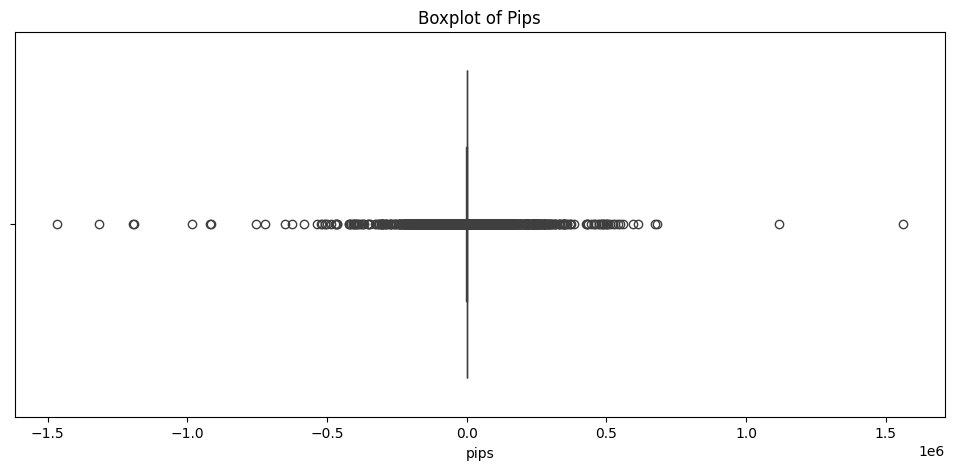

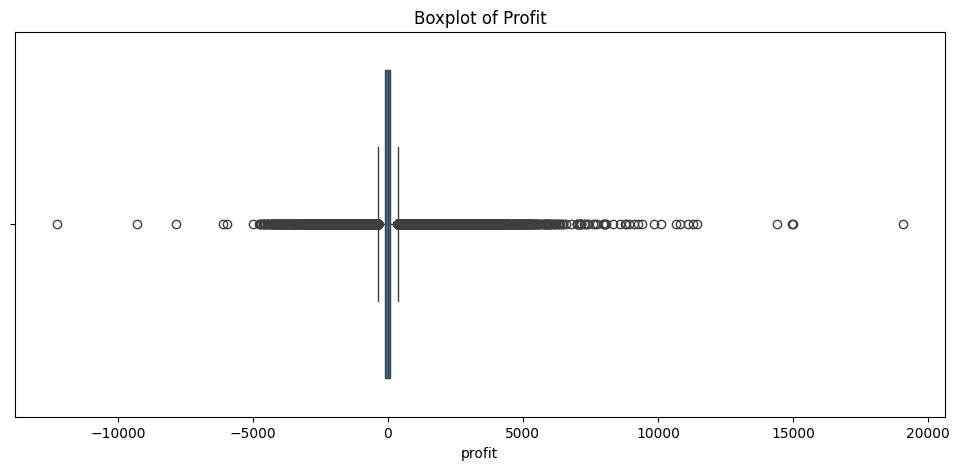

In [15]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["pips"])
plt.title("Boxplot of Pips")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df["profit"])
plt.title("Boxplot of Profit")
plt.show()

In [16]:
print(df[['pips', 'profit']].describe())

               pips        profit
count  5.931700e+04  59317.000000
mean   1.115243e+02     22.606170
std    3.093160e+04    687.227407
min   -1.465680e+06 -12250.000000
25%   -1.890000e+02   -102.000000
50%    7.200000e+00      2.000000
75%    2.430000e+02     81.860000
max    1.560000e+06  19061.100000


In [17]:
# Investigate extreme losses
extreme_losses = df[df['profit'] < -1000]  # Adjust threshold as needed
print("Extreme Losses:\n", extreme_losses[['symbol', 'type', 'volume', 'pips', 'profit', 'reason']])

Extreme Losses:
        symbol  type  volume    pips  profit             reason
2      XAUUSD  sell     200 -1199.0 -2398.0      Stop Loss Hit
3      XAUUSD   buy     190 -1012.0 -1922.8  Trailing Stop Hit
5      XAUUSD  sell     200  -634.0 -1268.0  Trailing Stop Hit
7      XAUUSD   buy     200 -2025.0 -4050.0  Trailing Stop Hit
9      XAUUSD  sell     190 -1592.0 -3024.8  Trailing Stop Hit
...       ...   ...     ...     ...     ...                ...
57831  EURUSD  sell    1000   -35.5 -3550.0            Expired
58630  XAUUSD  sell     100 -1060.0 -1060.0      Stop Loss Hit
58631  XAUUSD  sell     200  -906.0 -1812.0      Stop Loss Hit
58753  XAUUSD   buy     100 -1118.0 -1118.0            Expired
59066  XAUUSD   buy     100 -1125.0 -1125.0            Expired

[1928 rows x 6 columns]


**Profitability Analysis**

In [18]:
# calculate cumulative profits per login
cumulative_profits = df.groupby('login')['profit'].sum().sort_values()
print("Cumulative Profits per Login:\n", cumulative_profits)

Cumulative Profits per Login:
 login
13103928   -14778.82
13333728   -13868.00
55011482   -12215.00
13018096   -12194.31
13251499   -11405.24
              ...   
13070589    27023.68
13205503    27049.34
13088202    27848.61
55009560    28475.44
13378390    53891.98
Name: profit, Length: 600, dtype: float64


In [19]:
# Identify the most and least profitable logins
most_profitable = cumulative_profits.tail(10)  # Top 10 most profitable logins
least_profitable = cumulative_profits.head(10)  # Top 10 least profitable logins
print("Most Profitable Logins:\n", most_profitable)
print("Least Profitable Logins:\n", least_profitable)

Most Profitable Logins:
 login
55010677    24265.33
11173702    24301.54
13361147    25136.16
13205506    26494.85
55008451    27021.14
13070589    27023.68
13205503    27049.34
13088202    27848.61
55009560    28475.44
13378390    53891.98
Name: profit, dtype: float64
Least Profitable Logins:
 login
13103928   -14778.82
13333728   -13868.00
55011482   -12215.00
13018096   -12194.31
13251499   -11405.24
13410127   -10571.86
55009211   -10102.92
13276691   -10010.77
13054222    -9635.14
13131614    -9573.61
Name: profit, dtype: float64


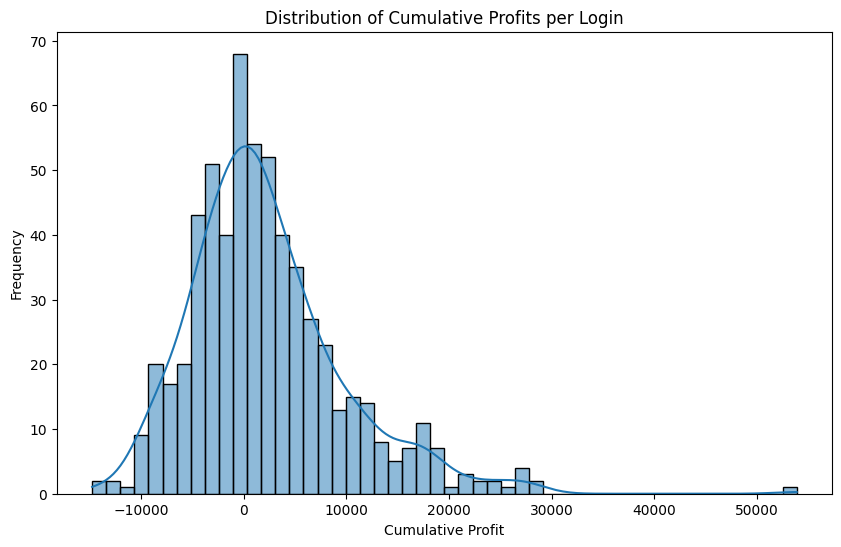

In [20]:
# visualize the distribution of profits
plt.figure(figsize=(10, 6))
sns.histplot(cumulative_profits, bins=50, kde=True)
plt.title("Distribution of Cumulative Profits per Login")
plt.xlabel("Cumulative Profit")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Analyze Features Affecting Profitability
# Correlation between profit and other numerical features

numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with profit
correlation = numeric_df.corr()["profit"].sort_values(ascending=False)
print("Correlation with Profit:\n", correlation)

Correlation with Profit:
 profit         1.000000
pips           0.137911
volume         0.011749
ticket         0.009388
take profit    0.005967
login         -0.005339
close_price   -0.008343
open_price    -0.009115
stop loss     -0.012062
Name: profit, dtype: float64


In [22]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
categorical_cols = ["symbol", "type", "reason"]
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Compute correlation again
encoded_correlation = df_encoded.corr()["profit"].sort_values(ascending=False)
print("Correlation with Profit (with encoded categories):\n", encoded_correlation)

Correlation with Profit (with encoded categories):
 profit         1.000000
pips           0.137911
volume         0.011749
ticket         0.009388
open_time      0.008821
take profit    0.005967
symbol         0.005432
close_time    -0.004877
login         -0.005339
close_price   -0.008343
open_price    -0.009115
stop loss     -0.012062
type          -0.021194
reason        -0.203092
Name: profit, dtype: float64


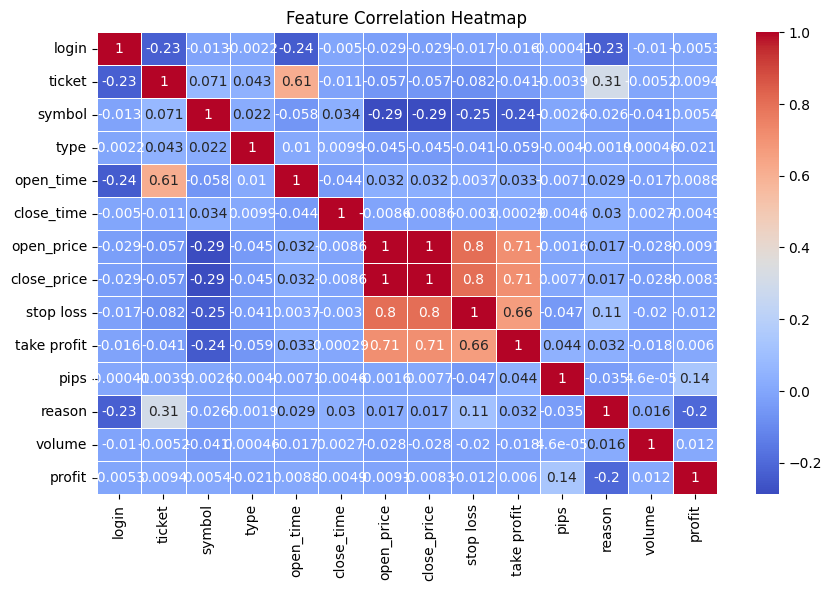

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

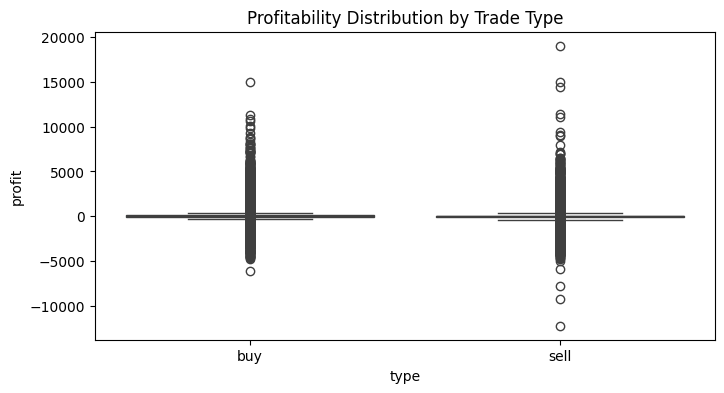

In [24]:
# profitability by trade type
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["type"], y=df["profit"])
plt.title("Profitability Distribution by Trade Type")
plt.show()

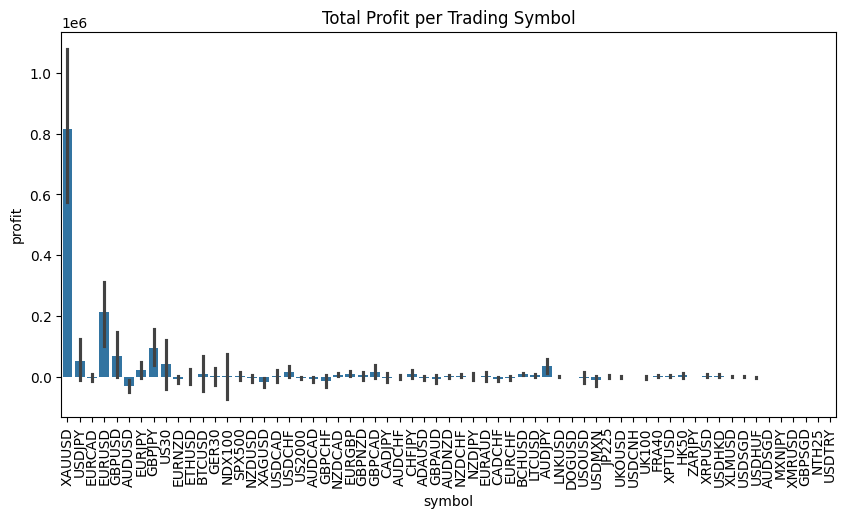

In [25]:
# profitability by trading symbol
plt.figure(figsize=(10, 5))
sns.barplot(x=df["symbol"], y=df["profit"], estimator=sum)
plt.xticks(rotation=90)
plt.title("Total Profit per Trading Symbol")
plt.show()

**Feature Engineering & Predictive Modeling**

In [26]:
# Feature Engineering
# 1. Profitability Flag
df['profitability_flag'] = df['profit'].apply(lambda x: 1 if x > 0 else 0)

In [27]:
# 2. Win Rate
win_rate = df.groupby('login')[['profitability_flag']].mean().reset_index()
win_rate.rename(columns={'profitability_flag': 'win_rate'}, inplace=True)

# 3. Average Profit per Trade
avg_profit = df[df['profit'] > 0].groupby('login')['profit'].mean().reset_index()
avg_profit.columns = ['login', 'avg_profit']

# 4. Average Loss per Trade
avg_loss = df[df['profit'] < 0].groupby('login')[['profit']].mean().reset_index()
avg_loss.rename(columns={'profit': 'avg_loss'}, inplace=True)

# 5. Extreme Loss Flag
extreme_loss_threshold = -1000  # Adjust as needed
df['extreme_loss_flag'] = df['profit'].apply(lambda x: 1 if x < extreme_loss_threshold else 0)

# 6. Trade Frequency
trade_frequency = df.groupby('login').size().reset_index(name='trade_frequency')

# 7. Volume Weighted Profit
df['volume_weighted_profit'] = df['profit'] * df['volume']
volume_weighted_profit = df.groupby('login')[['volume_weighted_profit']].sum().reset_index()

# Drop any existing columns to avoid merge conflicts
df.drop(columns=['win_rate', 'avg_profit', 'avg_loss', 'trade_frequency', 'volume_weighted_profit'], errors='ignore', inplace=True)

# Merge new features
df = df.merge(win_rate, on='login', how='left')
df = df.merge(avg_profit, on='login', how='left')
df = df.merge(avg_loss, on='login', how='left')
df = df.merge(trade_frequency, on='login', how='left')
df = df.merge(volume_weighted_profit, on='login', how='left')

# Final renaming of columns to ensure no conflicts
df.rename(columns={
    'win_rate_y': 'win_rate',
    'avg_profit_y': 'avg_profit',
    'avg_loss_y': 'avg_loss',
    'trade_frequency_y': 'trade_frequency',
    'volume_weighted_profit_y': 'volume_weighted_profit'
}, inplace=True)

# Print the first few rows of the final DataFrame
print(df.head())

      login    ticket  symbol  type           open_time          close_time  \
0  11173702  47345780  XAUUSD   buy 2024-07-30 11:05:29 2024-07-31 07:58:09   
1  11173702  47718163  XAUUSD   buy 2024-07-31 09:46:04 2024-07-31 21:42:15   
2  11173702  50360070  XAUUSD  sell 2024-08-13 13:03:27 2024-08-14 15:24:08   
3  11173702  51120570  XAUUSD   buy 2024-08-19 13:27:40 2024-08-19 16:37:12   
4  11173702  52180073  XAUUSD  sell 2024-08-28 02:30:32 2024-08-28 15:29:39   

   open_price  close_price  stop loss  take profit  ...             reason  \
0     2391.28      2420.69    2367.62      2420.64  ...        Margin Call   
1     2421.81      2431.41    2399.23      2431.41  ...        Margin Call   
2     2460.93      2472.80    2480.93      2451.37  ...      Stop Loss Hit   
3     2495.80      2485.65    2485.71      2508.16  ...  Trailing Stop Hit   
4     2526.53      2496.42    2537.07      2496.82  ...        Margin Call   

  volume   profit  profitability_flag  extreme_loss_flag

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Drop rows with missing target values (if any)
df.dropna(subset=['profitability_flag'], inplace=True)

print(df.columns)

Index(['login', 'ticket', 'symbol', 'type', 'open_time', 'close_time',
       'open_price', 'close_price', 'stop loss', 'take profit', 'pips',
       'reason', 'volume', 'profit', 'profitability_flag', 'extreme_loss_flag',
       'win_rate', 'avg_profit', 'avg_loss', 'trade_frequency',
       'volume_weighted_profit'],
      dtype='object')


In [29]:
df = df.loc[:, ~df.columns.duplicated()]
print(df.columns)

Index(['login', 'ticket', 'symbol', 'type', 'open_time', 'close_time',
       'open_price', 'close_price', 'stop loss', 'take profit', 'pips',
       'reason', 'volume', 'profit', 'profitability_flag', 'extreme_loss_flag',
       'win_rate', 'avg_profit', 'avg_loss', 'trade_frequency',
       'volume_weighted_profit'],
      dtype='object')


In [30]:
# Define features and target
X = df[['win_rate', 'avg_profit', 'avg_loss', 'extreme_loss_flag', 'trade_frequency', 'volume_weighted_profit']]
y = df['profitability_flag']
# Handle missing values
X.fillna(0, inplace=True)  # Fill missing values with 0

# Preprocessing pipeline
numerical_features = ['win_rate', 'avg_profit', 'avg_loss', 'trade_frequency', 'volume_weighted_profit']
categorical_features = ['extreme_loss_flag']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

<ipython-input-30-8a4fbf1fe28f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Fill missing values with 0


In [31]:
# Define the column names for transformed features
numerical_columns = numerical_features  # These will stay the same after scaling
categorical_columns = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine the column names
columns = np.concatenate([numerical_columns, categorical_columns])

# Convert the NumPy array (X_preprocessed) to a DataFrame with correct column names
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=columns)

In [32]:
print(f"Shape of X_preprocessed_df: {X_preprocessed_df.shape}")

Shape of X_preprocessed_df: (59317, 7)


In [33]:
print("Missing values in X_preprocessed_df:", pd.DataFrame(X_preprocessed_df).isnull().sum().sum())

Missing values in X_preprocessed_df: 0


In [34]:
print("Data types of X_preprocessed_df:\n", pd.DataFrame(X_preprocessed_df).dtypes)

Data types of X_preprocessed_df:
 win_rate                  float64
avg_profit                float64
avg_loss                  float64
trade_frequency           float64
volume_weighted_profit    float64
extreme_loss_flag_0       float64
extreme_loss_flag_1       float64
dtype: object


In [35]:
# Check the column names
print("Column names of X_preprocessed_df:", X_preprocessed_df.columns)

Column names of X_preprocessed_df: Index(['win_rate', 'avg_profit', 'avg_loss', 'trade_frequency',
       'volume_weighted_profit', 'extreme_loss_flag_0', 'extreme_loss_flag_1'],
      dtype='object')


In [39]:
# Build a predictive model
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train a Logistic Regression model
model = LogisticRegression()

# Perform 5-fold Cross-Validation
y_pred_cv = cross_val_predict(model, X_preprocessed_df, y, cv=5)

# Generate classification report
report = classification_report(y, y_pred_cv, digits=4)
print("Classification Report:\n", report)

# Fit the model
model.fit(X_preprocessed_df, y)

Classification Report:
               precision    recall  f1-score   support

           0     0.6487    0.5505    0.5956     27308
           1     0.6604    0.7457    0.7004     32009

    accuracy                         0.6558     59317
   macro avg     0.6545    0.6481    0.6480     59317
weighted avg     0.6550    0.6558    0.6522     59317



LogisticRegression()

In [40]:
# Predict the profitability flag for each trader using the trained model
df['predicted_profitability_flag'] = model.predict(X_preprocessed_df)
print(df[['login', 'predicted_profitability_flag']].head())

# Calculate the cumulative profit for each trader
df['cumulative_profit'] = df.groupby('login')['profit'].cumsum()
print(df[['login', 'cumulative_profit']].head())


# Validate the alignment between the predicted profitability and actual cumulative profit
# If the model predicts profitable (1), the cumulative profit should be positive.
# If the model predicts non-profitable (0), the cumulative profit should be non-positive.

df['prediction_correct'] = df.apply(
    lambda row: 1 if (row['predicted_profitability_flag'] == 1 and row['cumulative_profit'] > 0) or
                (row['predicted_profitability_flag'] == 0 and row['cumulative_profit'] <= 0)
                else 0, axis=1
)

print("\n Correctness of Predictions (first few rows):")
print(df[['login', 'predicted_profitability_flag', 'cumulative_profit', 'prediction_correct']].head())


# Check how many predictions align with the actual cumulative profit
alignment_accuracy = df['prediction_correct'].mean()
print(f"Alignment Accuracy: {alignment_accuracy:.4f}")

# Optionally, check the rows where the prediction was incorrect
#incorrect_predictions = df[df['prediction_correct'] == 0]
#print("Incorrect Predictions where the model's profitability flag does not match cumulative profit:")
#print(incorrect_predictions[['login', 'predicted_profitability_flag', 'cumulative_profit']])

      login  predicted_profitability_flag
0  11173702                             1
1  11173702                             1
2  11173702                             0
3  11173702                             0
4  11173702                             1
      login  cumulative_profit
0  11173702            5578.40
1  11173702            7498.40
2  11173702            5100.40
3  11173702            3177.60
4  11173702            8792.79

 Correctness of Predictions (first few rows):
      login  predicted_profitability_flag  cumulative_profit  \
0  11173702                             1            5578.40   
1  11173702                             1            7498.40   
2  11173702                             0            5100.40   
3  11173702                             0            3177.60   
4  11173702                             1            8792.79   

   prediction_correct  
0                   1  
1                   1  
2                   0  
3                   0  
4         

In [41]:
# Analyze Extreme losses separately
# Identify traders with extreme losses
extreme_loss_traders = df[df['extreme_loss_flag'] == 1]['login'].unique()

# Create a separate dataset for extreme loss traders
extreme_loss_df = df[df['login'].isin(extreme_loss_traders)]

# Analyze extreme loss traders
print("Extreme Loss Traders Analysis:")
print(extreme_loss_df.groupby('login').agg({
    'profit': 'sum',
    'trade_frequency': 'mean',
    'win_rate': 'mean'
}).reset_index())

Extreme Loss Traders Analysis:
          login    profit  trade_frequency  win_rate
0      11173702  24301.54             46.0  0.478261
1      11180486  -5104.39             28.0  0.607143
2      11191905   7407.46             32.0  0.468750
3      11192001   5820.21            133.0  0.518797
4      11199499  -3523.99             19.0  0.473684
..          ...       ...              ...       ...
360    55013105  -4380.93             29.0  0.482759
361    55013106   7755.88            215.0  0.358140
362    55013211  -1910.00              3.0  0.333333
363  2145732335  -4370.11            309.0  0.278317
364  2145732336  -4107.15            271.0  0.309963

[365 rows x 4 columns]


**Clustering and Trader Segmentation**

In [42]:
#print(df.columns)
#debugging purpose

Index(['login', 'ticket', 'symbol', 'type', 'open_time', 'close_time',
       'open_price', 'close_price', 'stop loss', 'take profit', 'pips',
       'reason', 'volume', 'profit', 'profitability_flag', 'extreme_loss_flag',
       'win_rate', 'avg_profit', 'avg_loss', 'trade_frequency',
       'volume_weighted_profit', 'predicted_profitability_flag',
       'cumulative_profit', 'prediction_correct'],
      dtype='object')


In [56]:
from sklearn.cluster import KMeans

# Define features for clustering
clustering_features = ['win_rate', 'avg_profit', 'avg_loss', 'extreme_loss_flag', 'trade_frequency', 'volume_weighted_profit']

# Extract the features from the DataFrame
X_clustering = df[['cumulative_profit']]

# Handle missing values in clustering features (using SimpleImputer to fill NaN values)
imputer = SimpleImputer(strategy='mean')  # Impute missing values with the mean
X_clustering_imputed = imputer.fit_transform(X_clustering)

# Scale the features after imputation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering_imputed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters: Losers, Profitable Traders, Outliers
df['cluster'] = kmeans.fit_predict(X_scaled)  # Create the 'cluster' column

# Check the distribution of cumulative profit in each cluster
for cluster in range(3):
    cluster_data = df[df['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data['cumulative_profit'].describe())


# Create a dictionary to label clusters based on average cumulative profit
cluster_labels = {}
cluster_labels[0] = 'Losses'  # Cluster 0 contains negative cumulative profits (Losers)
cluster_labels[1] = 'Neutral'  # Cluster 1 contains a mix of negative and positive profits
cluster_labels[2] = 'Profitable Traders'  # Cluster 2 contains high positive cumulative profits


# Map the cluster labels to the 'cluster_label' column
df['cluster_label'] = df['cluster'].map(cluster_labels)

# Verify if the labels make sense
print(df[['login', 'cumulative_profit', 'cluster_label']].head())

Cluster 0:
count    17897.000000
mean     -4479.116202
std       2384.630577
min     -15777.490000
25%      -6305.790000
50%      -4036.570000
75%      -2493.740000
max      -1240.800000
Name: cumulative_profit, dtype: float64
Cluster 1:
count    33480.000000
mean      2042.596239
std       2314.856311
min      -1240.690000
25%        175.650000
50%       1435.025000
75%       3642.802500
max       7783.810000
Name: cumulative_profit, dtype: float64
Cluster 2:
count     7940.000000
mean     13577.813413
std       4974.058757
min       7785.180000
25%       9587.727500
50%      12100.945000
75%      16703.642500
max      53891.980000
Name: cumulative_profit, dtype: float64
      login  cumulative_profit       cluster_label
0  11173702            5578.40             Neutral
1  11173702            7498.40             Neutral
2  11173702            5100.40             Neutral
3  11173702            3177.60             Neutral
4  11173702            8792.79  Profitable Traders


In [57]:
# Identify the "Losers" cluster (Cluster 0)
losers_in_cluster = df[df['cluster'] == 0]

# Verify that traders in the "Losers" cluster have negative cumulative profits
print("Traders in the 'Losers' cluster with negative cumulative profits:")
print(losers_in_cluster[losers_in_cluster['cumulative_profit'] < 0][['login', 'cumulative_profit', 'cluster_label']].head())

# To check how many traders in the "Losers" cluster have negative cumulative profits
negative_losers = losers_in_cluster[losers_in_cluster['cumulative_profit'] < 0]
print(f"Number of traders in the 'Losers' cluster with negative cumulative profits: {negative_losers.shape[0]}")

Traders in the 'Losers' cluster with negative cumulative profits:
       login  cumulative_profit cluster_label
64  11178446           -1240.96        Losses
65  11178446           -1518.96        Losses
66  11178446           -1928.96        Losses
67  11178446           -1922.96        Losses
68  11178446           -2044.96        Losses
Number of traders in the 'Losers' cluster with negative cumulative profits: 17897


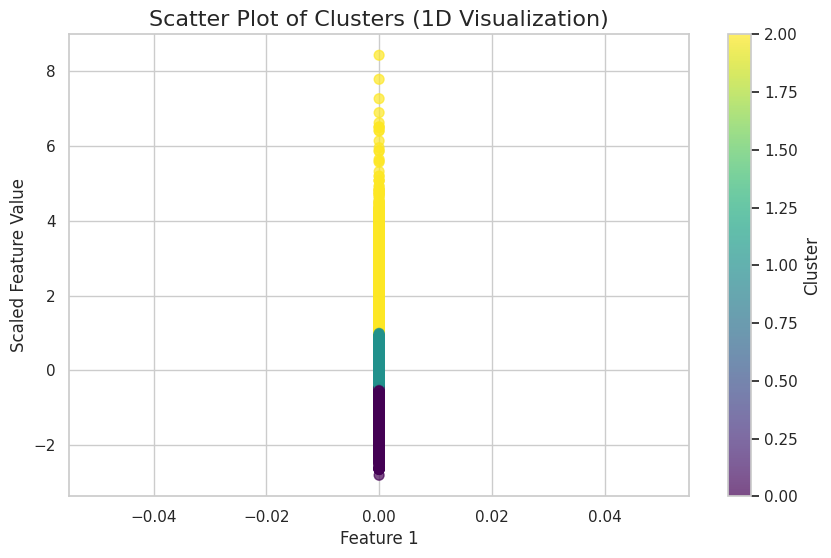

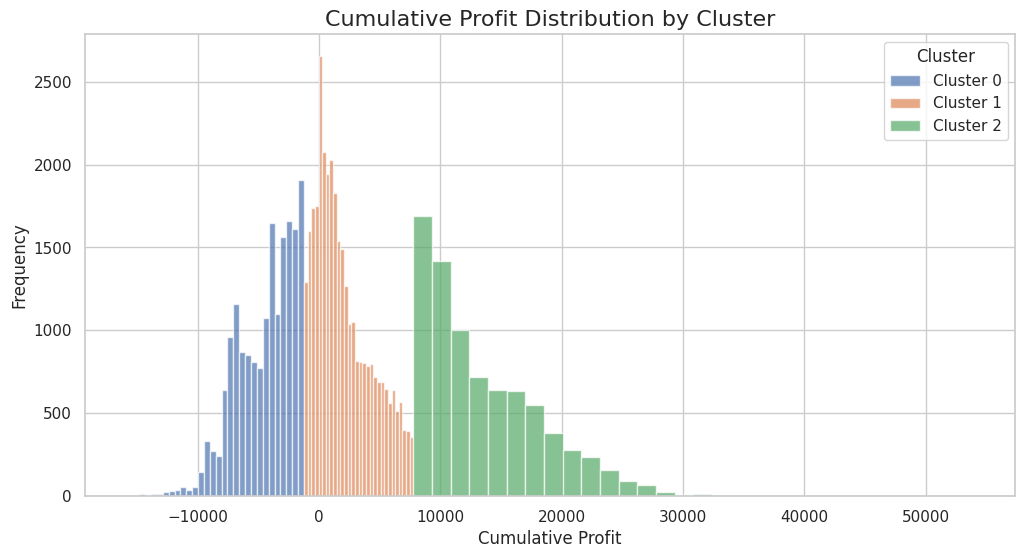

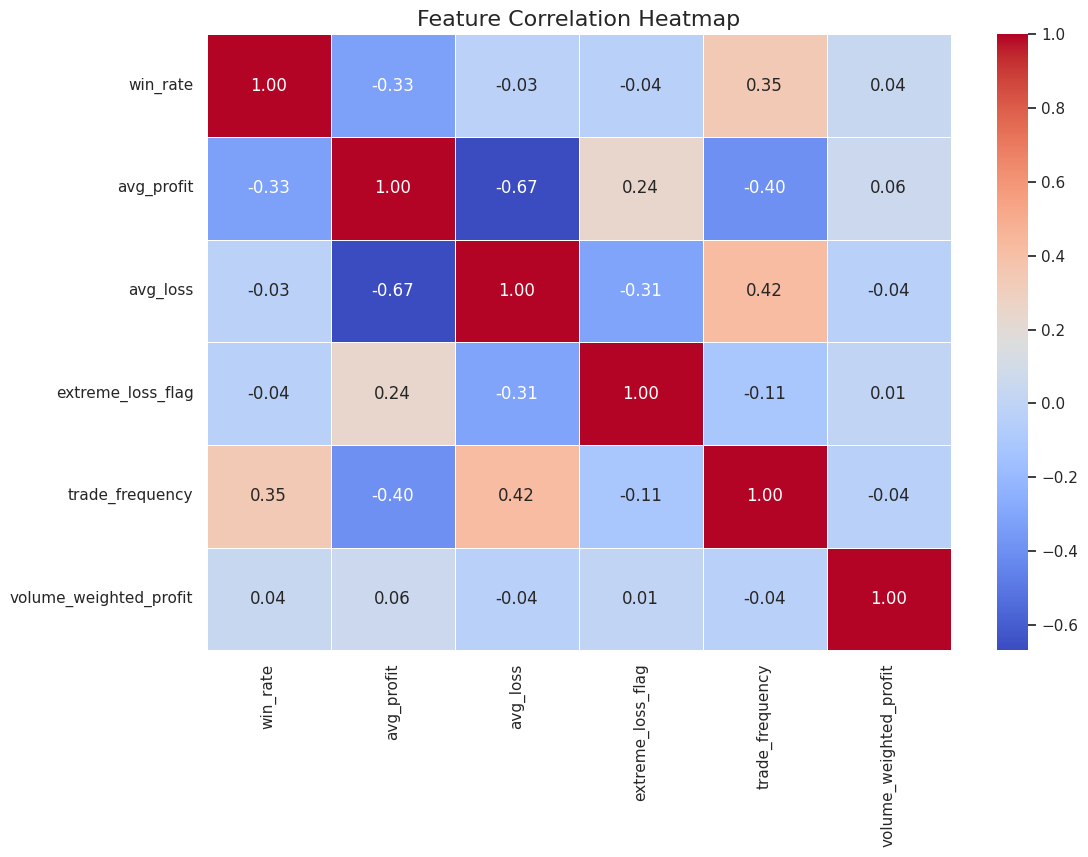

In [60]:
from sklearn.decomposition import PCA
# Set the seaborn style
sns.set(style="whitegrid")

# 1. Scatter Plot: Clusters on PCA (1D)
# As we only have 1 feature, PCA can't reduce it to 2D, so we plot the 1D data
plt.figure(figsize=(10, 6))
plt.scatter(np.zeros_like(X_scaled), X_scaled, c=df['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title("Scatter Plot of Clusters (1D Visualization)", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)  # In this case, it is just the one feature
plt.ylabel("Scaled Feature Value", fontsize=12)
plt.colorbar(label='Cluster')
plt.show()

# 2. Histogram: Cumulative profit distribution by cluster
plt.figure(figsize=(12, 6))
for cluster in range(3):
    plt.hist(df[df['cluster'] == cluster]['cumulative_profit'], bins=30, alpha=0.7, label=f"Cluster {cluster}")
plt.title("Cumulative Profit Distribution by Cluster", fontsize=16)
plt.xlabel("Cumulative Profit", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Cluster")
plt.show()

# 3. Heatmap: Correlation matrix of features used for clustering
correlation_matrix = df[clustering_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [1]:
!pip freeze > requirements.txt